###  1) Prepare a classification model using SVM for salary data 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('SalaryData_Test.csv')
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [3]:
data = data.dropna()

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [5]:
from sklearn.model_selection import train_test_split
x = data.drop('Salary', axis=1)
y = data['Salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
from sklearn.svm import SVC
model = SVC(kernel='linear')  
model.fit(x_train_scaled, y_train)

SVC(kernel='linear')

In [8]:
predictions = model.predict(x_test_scaled)

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8011288180610889

In [10]:
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[2182,   64],
       [ 535,  231]], dtype=int64)

In [11]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2246
           1       0.78      0.30      0.44       766

    accuracy                           0.80      3012
   macro avg       0.79      0.64      0.66      3012
weighted avg       0.80      0.80      0.77      3012



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

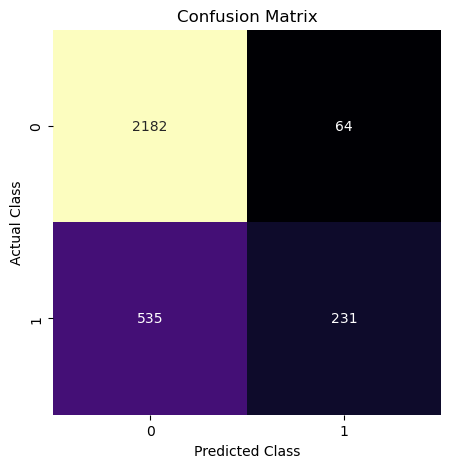

In [19]:
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix , annot=True, fmt='d', cmap='magma', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### 2) classify the Size_Categorie using SVM

In [20]:
data = pd.read_csv('forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [21]:
data = data.dropna()

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
data['month'] = label_encoder.fit_transform(data['month'])
data['day'] = label_encoder.fit_transform(data['day'])

In [23]:
x = data.drop('size_category', axis=1)
y = data['size_category']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
from sklearn.svm import SVC
model = SVC(kernel='linear')  
model.fit(x_train_scaled, y_train)

SVC(kernel='linear')

In [27]:
predictions = model.predict(x_test_scaled)

In [28]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9230769230769231

In [29]:
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix 

array([[23,  5],
       [ 3, 73]], dtype=int64)

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       large       0.88      0.82      0.85        28
       small       0.94      0.96      0.95        76

    accuracy                           0.92       104
   macro avg       0.91      0.89      0.90       104
weighted avg       0.92      0.92      0.92       104



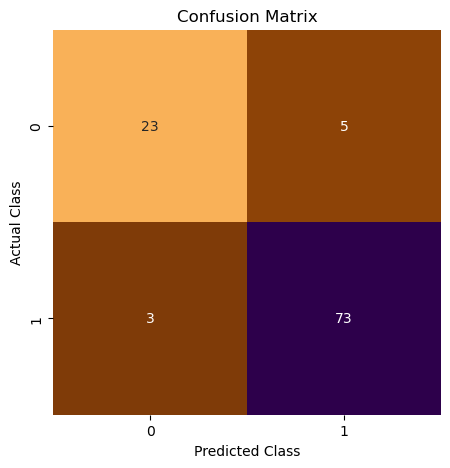

In [32]:
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix , annot=True, fmt='d', cmap='PuOr', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()